In [27]:
table_data = {
    "LIME-F": {"ImageNet-S Pur": "0.201 $\\pm$ 0.008", "CosmoGrid MSE": "0.049 $\\pm$ 0.003", "CosmoGrid Pur": "0.375 $\\pm$ 0.018", "Model-Agnostic": "Yes"},
    "SHAP-F": {"ImageNet-S Pur": "0.238 $\\pm$ 0.009", "CosmoGrid MSE": "0.028 $\\pm$ 0.002", "CosmoGrid Pur": "0.397 $\\pm$ 0.016", "Model-Agnostic": "Yes"},
    "IG-F": {"ImageNet-S Pur": "0.242 $\\pm$ 0.009", "CosmoGrid MSE": "0.042 $\\pm$ 0.003", "CosmoGrid Pur": "0.391 $\\pm$ 0.011", "Model-Agnostic": "Yes"},
    "GC-F": {"ImageNet-S Pur": "0.361 $\\pm$ 0.011", "CosmoGrid MSE": "0.036 $\\pm$ 0.002", "CosmoGrid Pur": "0.438 $\\pm$ 0.019", "Model-Agnostic": "Yes"},
    "FG-F": {"ImageNet-S Pur": "0.260 $\\pm$ 0.009", "CosmoGrid MSE": "0.036 $\\pm$ 0.002", "CosmoGrid Pur": "0.529 $\\pm$ 0.016", "Model-Agnostic": "Yes"},
    "RISE-F": {"ImageNet-S Pur": "0.436 $\\pm$ 0.011", "CosmoGrid MSE": "0.036 $\\pm$ 0.003", "CosmoGrid Pur": "0.342 $\\pm$ 0.006", "Model-Agnostic": "Yes"},
    "Archi-F": {"ImageNet-S Pur": "0.316 $\\pm$ 0.010", "CosmoGrid MSE": "0.069 $\\pm$ 0.002", "CosmoGrid Pur": "0.487 $\\pm$ 0.004", "Model-Agnostic": "Yes"},
    "MFABA-F": {"ImageNet-S Pur": "0.258 $\\pm$ 0.009", "CosmoGrid MSE": "0.035 $\\pm$ 0.003", "CosmoGrid Pur": "0.498 $\\pm$ 0.014", "Model-Agnostic": "Yes"},
    "AGI-F": {"ImageNet-S Pur": "0.250 $\\pm$ 0.009", "CosmoGrid MSE": "0.040 $\\pm$ 0.002", "CosmoGrid Pur": "0.522 $\\pm$ 0.010", "Model-Agnostic": "Yes"},
    "AMPE-F": {"ImageNet-S Pur": "0.241 $\\pm$ 0.008", "CosmoGrid MSE": "0.037 $\\pm$ 0.002", "CosmoGrid Pur": "0.366 $\\pm$ 0.037", "Model-Agnostic": "Yes"},
    "BCos-F": {"ImageNet-S Pur": "0.364 $\\pm$ 0.011", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "XDNN": {"ImageNet-S Pur": "0.249 $\\pm$ 0.009", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "BagNet": {"ImageNet-S Pur": "0.261 $\\pm$ 0.009", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "FRESH": {"ImageNet-S Pur": "0.191 $\\pm$ 0.008", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "SOP": {"ImageNet-S Pur": "0.401 $\\pm$ 0.011", "CosmoGrid MSE": "0.025 $\\pm$ 0.002", "CosmoGrid Pur": "0.647 $\\pm$ 0.011", "Model-Agnostic": "Yes"}
}

In [46]:
name_mapping = {
    'lime_20': 'LIME-F',
    'shap_20': 'SHAP-F',
    'gradcam': 'GC-F',
    'intgrad': 'IG-F',
    'fullgrad': 'FG-F',
    'rise_20': 'RISE-F',
    'archipelago': 'Archi-F',
    'mfaba': 'MFABA-F',
    'agi': 'AGI-F',
    'ampe': 'AMPE-F',
    'bcos': 'BCos-F',
    'xdnn': 'XDNN',
    'bagnet': 'BagNet',
    'attn': 'FRESH',
    'sop': 'SOP',
}

import torch
imagenet_s_acc_dict = torch.load('imagenet_acc_all2.pt')

In [48]:
import numpy as np
import random

SEED = 42
def bootstrap_mean_std(corrects, n_samples=4):
    means = []
    random.seed(SEED)
    for _ in range(n_samples):
        sample = random.choices(corrects, k=len(corrects))  # sampling with replacement
        means.append(np.mean(sample))
    return np.mean(means), np.std(means)


# Calculate mean and std for each explainer
final_results = {}
for key, metrics in imagenet_s_acc_dict.items():
    try:
        explainer_name = name_mapping[key]  # map key to row name
        mean, std = bootstrap_mean_std([1 - x for x in metrics['corrects']])
        final_results[explainer_name] = f'{mean:.3f} $\\pm$ {std:.3f}'
    except:
        continue

# Print the results
for method, result in final_results.items():
    print(f"{method}: {result}")

BCos-F: 0.954 $\pm$ 0.006
XDNN: 0.871 $\pm$ 0.007
BagNet: 0.501 $\pm$ 0.011
SOP: 0.267 $\pm$ 0.017
SHAP-F: 0.306 $\pm$ 0.027
RISE-F: 0.732 $\pm$ 0.009
LIME-F: 0.327 $\pm$ 0.014
FG-F: 0.448 $\pm$ 0.024
GC-F: 0.455 $\pm$ 0.016
IG-F: 0.581 $\pm$ 0.013
FRESH: 0.537 $\pm$ 0.020
Archi-F: 0.526 $\pm$ 0.016
MFABA-F: 0.493 $\pm$ 0.016
AGI-F: 0.407 $\pm$ 0.011
AMPE-F: 0.484 $\pm$ 0.016


In [49]:
for key in table_data:
    table_data[key]['ImageNet-S Err'] = final_results[key]

In [54]:
def generate_latex_table(table_data):
    latex_table = r"""\begin{tabularx}{\textwidth}{c|c|*{1}>{\centering\arraybackslash}X|*{2}{>{\centering\arraybackslash}X}|*{2}{>{\centering\arraybackslash}X}}
    \toprule
    \multirow{2}{*}{Category} & \multirow{2}{*}{Method} & \multirow{2}{*}{Model-Agnostic} & \multicolumn{2}{c|}{\textbf{ImageNet-S}} & \multicolumn{2}{c}{\textbf{CosmoGrid}} \\
    & & & Err.$\downarrow$ & Pur.$\uparrow$ & MSE.$\downarrow$ & Pur.$\uparrow$ \\
    \midrule
    """

    post_hoc_methods = ["LIME-F", "SHAP-F", "IG-F", "GC-F", "FG-F", "RISE-F", "Archi-F", "MFABA-F", "AGI-F", "AMPE-F", "BCos-F", "XDNN"]
    self_explaining_methods = ["BagNet", "FRESH", "SOP"]
    all_methods = post_hoc_methods + self_explaining_methods

    def get_value(s):
        return float(s.split()[0]) if s != '-' else float('-inf')

    metrics = ["ImageNet-S Err", "ImageNet-S Pur", "CosmoGrid MSE", "CosmoGrid Pur"]
    best = {
        "ImageNet-S Err": min((get_value(table_data[method]["ImageNet-S Err"]), method) for method in all_methods),
        "ImageNet-S Pur": max((get_value(table_data[method]["ImageNet-S Pur"]), method) for method in all_methods),
        "CosmoGrid MSE": min((get_value(table_data[method]["CosmoGrid MSE"]), method) for method in all_methods if table_data[method]["CosmoGrid MSE"] != '-'),
        "CosmoGrid Pur": max((get_value(table_data[method]["CosmoGrid Pur"]), method) for method in all_methods if table_data[method]["CosmoGrid Pur"] != '-')
    }
    second_best = {
        "ImageNet-S Err": sorted([(get_value(table_data[method]["ImageNet-S Err"]), method) for method in all_methods])[1],
        "ImageNet-S Pur": sorted([(get_value(table_data[method]["ImageNet-S Pur"]), method) for method in all_methods], reverse=True)[1],
        "CosmoGrid MSE": sorted([(get_value(table_data[method]["CosmoGrid MSE"]), method) for method in all_methods if table_data[method]["CosmoGrid MSE"] != '-'])[1],
        "CosmoGrid Pur": sorted([(get_value(table_data[method]["CosmoGrid Pur"]), method) for method in all_methods if table_data[method]["CosmoGrid Pur"] != '-'], reverse=True)[1]
    }

    def format_value(method, metric):
        value = table_data[method][metric]
        if value == '-':
            return value
        mean, std = value.split(' $\\pm$ ')
        if method == best[metric][1]:
            return r"\textbf{" + mean + "} $\\pm$ " + std
        elif method == second_best[metric][1]:
            return r"\textit{" + mean + "} $\\pm$ " + std
        return value

    latex_table += " & ".join(["Post-hoc-", "LIME-F", table_data["LIME-F"]["Model-Agnostic"]] + 
                              [format_value("LIME-F", m) for m in metrics]) + r" \\"
    latex_table += "\n"

    for method in post_hoc_methods[1:]:
        latex_table += " & ".join(["Converted" if method == "SHAP-F" else "", method, table_data[method]["Model-Agnostic"]] + 
                                  [format_value(method, m) for m in metrics]) + r" \\"
        latex_table += "\n"

    latex_table += r"\midrule" + "\n"
    latex_table += r"\multirow{3}{*}{Self-Explaining}"

    for method in self_explaining_methods:
        latex_table += " & ".join(["", method, table_data[method]["Model-Agnostic"]] + 
                                  [format_value(method, m) for m in metrics]) + r" \\"
        latex_table += "\n"

    latex_table += r"\bottomrule" + "\n"
    latex_table += r"\end{tabularx}"

    return latex_table

# Use the function with the provided table_data
print(generate_latex_table(table_data))

\begin{tabularx}{\textwidth}{c|c|*{1}>{\centering\arraybackslash}X|*{2}{>{\centering\arraybackslash}X}|*{2}{>{\centering\arraybackslash}X}}
    \toprule
    \multirow{2}{*}{Category} & \multirow{2}{*}{Method} & \multirow{2}{*}{Model-Agnostic} & \multicolumn{2}{c|}{\textbf{ImageNet-S}} & \multicolumn{2}{c}{\textbf{CosmoGrid}} \\
    & & & Err.$\downarrow$ & Pur.$\uparrow$ & MSE.$\downarrow$ & Pur.$\uparrow$ \\
    \midrule
    Post-hoc- & LIME-F & Yes & 0.327 $\pm$ 0.014 & 0.201 $\pm$ 0.008 & 0.049 $\pm$ 0.003 & 0.375 $\pm$ 0.018 \\
Converted & SHAP-F & Yes & \textit{0.306} $\pm$ 0.027 & 0.238 $\pm$ 0.009 & \textit{0.028} $\pm$ 0.002 & 0.397 $\pm$ 0.016 \\
 & IG-F & Yes & 0.581 $\pm$ 0.013 & 0.242 $\pm$ 0.009 & 0.042 $\pm$ 0.003 & 0.391 $\pm$ 0.011 \\
 & GC-F & Yes & 0.455 $\pm$ 0.016 & 0.361 $\pm$ 0.011 & 0.036 $\pm$ 0.002 & 0.438 $\pm$ 0.019 \\
 & FG-F & Yes & 0.448 $\pm$ 0.024 & 0.260 $\pm$ 0.009 & 0.036 $\pm$ 0.002 & \textit{0.529} $\pm$ 0.016 \\
 & RISE-F & Yes & 0.732 $\pm$ 0.009 

In [29]:
# import torch
# imagenet_s_acc_all_dict = torch.load('imagenet_acc_all.pt')

In [52]:
backbone_acc = imagenet_s_acc_dict['backbone']['acc']
backbone_acc

0.9031556039173014

/tmp/ipykernel_16909/834207708.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(Xs[-1:], Ys[-1:], xerr=Xerr[-1:], yerr=Yerr[-1:], fmt='o', color='red', marker='*', markersize=5, elinewidth=1, ecolor='k')


imagenet_figs/error_rate_vs_purity_imagenet.pdf


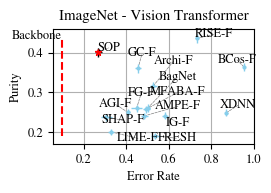

In [92]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import ConnectionPatch
import numpy as np

plt.rcParams.update({
    'font.size': 9,
    'font.family': 'STIXGeneral'
})

# Function to determine Pareto frontier
def pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]
    for pair in myList[1:]:
        if maxY:
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

labels = list(table_data.keys())

title_X = r'Error Rate'
title_Y = r'Purity'
title = f'{title_X} vs {title_Y}'

fig, ax = plt.subplots(figsize=(2.6, 1.5))
Xs = [float(table_data[key]["ImageNet-S Err"].split()[0]) for key in table_data]
Ys = [float(table_data[key]["ImageNet-S Pur"].split()[0]) for key in table_data]
Xerr = [float(table_data[key]["ImageNet-S Err"].split()[-1]) for key in table_data]
Yerr = [float(table_data[key]["ImageNet-S Pur"].split()[-1]) for key in table_data]
# Xerr = [data[key]['err_std'] for key in name_mapping]  # Standard deviations for X
# Yerr = [data[key]['purity_std'] for key in name_mapping]  # Standard deviations for Y
# labels = list(name_mapping.keys())
pf_X, pf_Y = pareto_frontier(Xs, Ys, maxX=False, maxY=True)

# Using errorbar to add both scatter points and error bars
ax.errorbar(Xs[:-1], Ys[:-1], xerr=Xerr[:-1], yerr=Yerr[:-1], fmt='o', color='skyblue', markersize=2, elinewidth=1) #, ecolor='k')
ax.errorbar(Xs[-1:], Ys[-1:], xerr=Xerr[-1:], yerr=Yerr[-1:], fmt='o', color='red', marker='*', markersize=5, elinewidth=1, ecolor='k')

texts = []
for i, txt in enumerate(labels):
    texts.append(ax.annotate(txt, (Xs[i], Ys[i])))
adjust_text(texts)

# Adding lines from text to marker
for i, txt in enumerate(labels):
    text = texts[i]
    ax.add_patch(ConnectionPatch(
        xyA=(Xs[i], Ys[i]), xyB=(text.get_position()),
        coordsA="data", coordsB="data",
        axesA=ax, axesB=ax,
        color="grey", linewidth=0.5, linestyle="--"
    ))
    
ax.set_xlabel(title.split('vs')[0].strip()) # + r' $\downarrow$')
ax.set_ylabel(title.split('vs')[1].strip()) # + r' $\uparrow$')
ax.set_title('ImageNet - Vision Transformer')
ax.grid(True)
backbone_Xs = [1 - backbone_acc, 1 - backbone_acc]
backbone_Ys = [min(Ys), max(Ys)]
ax.plot(backbone_Xs, backbone_Ys, color='red', linestyle='--')
ax.text(backbone_Xs[1], backbone_Ys[1] + 0.02, 'Backbone', color='k', ha='right', va='top')

file_name = f'imagenet_figs/{title.replace(" ", "_").lower()}_imagenet.pdf'
print(file_name)
plt.savefig(file_name, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
table_data = {
    "LIME-F": {"ImageNet-S Pur": "0.201 $\\pm$ 0.008", "CosmoGrid MSE": "0.049 $\\pm$ 0.003", "CosmoGrid Pur": "0.375 $\\pm$ 0.018", "Model-Agnostic": "Yes"},
    "SHAP-F": {"ImageNet-S Pur": "0.238 $\\pm$ 0.009", "CosmoGrid MSE": "0.028 $\\pm$ 0.002", "CosmoGrid Pur": "0.397 $\\pm$ 0.016", "Model-Agnostic": "Yes"},
    "IG-F": {"ImageNet-S Pur": "0.242 $\\pm$ 0.009", "CosmoGrid MSE": "0.042 $\\pm$ 0.003", "CosmoGrid Pur": "0.391 $\\pm$ 0.011", "Model-Agnostic": "Yes"},
    "GC-F": {"ImageNet-S Pur": "0.361 $\\pm$ 0.011", "CosmoGrid MSE": "0.036 $\\pm$ 0.002", "CosmoGrid Pur": "0.438 $\\pm$ 0.019", "Model-Agnostic": "Yes"},
    "FG-F": {"ImageNet-S Pur": "0.260 $\\pm$ 0.009", "CosmoGrid MSE": "0.036 $\\pm$ 0.002", "CosmoGrid Pur": "0.529 $\\pm$ 0.016", "Model-Agnostic": "Yes"},
    "RISE-F": {"ImageNet-S Pur": "0.436 $\\pm$ 0.011", "CosmoGrid MSE": "0.036 $\\pm$ 0.003", "CosmoGrid Pur": "0.342 $\\pm$ 0.006", "Model-Agnostic": "Yes"},
    "Archi-F": {"ImageNet-S Pur": "0.316 $\\pm$ 0.010", "CosmoGrid MSE": "0.069 $\\pm$ 0.002", "CosmoGrid Pur": "0.487 $\\pm$ 0.004", "Model-Agnostic": "Yes"},
    "MFABA-F": {"ImageNet-S Pur": "0.258 $\\pm$ 0.009", "CosmoGrid MSE": "0.035 $\\pm$ 0.003", "CosmoGrid Pur": "0.498 $\\pm$ 0.014", "Model-Agnostic": "Yes"},
    "AGI-F": {"ImageNet-S Pur": "0.250 $\\pm$ 0.009", "CosmoGrid MSE": "0.040 $\\pm$ 0.002", "CosmoGrid Pur": "0.522 $\\pm$ 0.010", "Model-Agnostic": "Yes"},
    "AMPE-F": {"ImageNet-S Pur": "0.241 $\\pm$ 0.008", "CosmoGrid MSE": "0.037 $\\pm$ 0.002", "CosmoGrid Pur": "0.366 $\\pm$ 0.037", "Model-Agnostic": "Yes"},
    "BCos-F": {"ImageNet-S Pur": "0.364 $\\pm$ 0.011", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "XDNN": {"ImageNet-S Pur": "0.249 $\\pm$ 0.009", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "BagNet": {"ImageNet-S Pur": "0.261 $\\pm$ 0.009", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "FRESH": {"ImageNet-S Pur": "0.191 $\\pm$ 0.008", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "SOP": {"ImageNet-S Pur": "0.401 $\\pm$ 0.011", "CosmoGrid MSE": "0.025 $\\pm$ 0.002", "CosmoGrid Pur": "0.647 $\\pm$ 0.011", "Model-Agnostic": "Yes"}
}

# Purity

In [1]:
purities_split = {
 'bcos': {'purity_correct': 0.2122523814439774,
  'purity_incorrect': 0.3667315442070769,
  'ratio_obj_correct': 0.5337406565745672,
  'ratio_obj_incorrect': 0.34529162591218915,
  'ratio_obj_cover_correct': 0.3921241372823715,
  'ratio_obj_cover_incorrect': 0.2222329114658544,
  'correct_obj_size': 0.34114450336537694,
  'incorrect_obj_size': 0.3135652885467786},
 'xdnn': {'purity_correct': 0.22476491257548337,
  'purity_incorrect': 0.24998301360445374,
  'ratio_obj_correct': 0.4248798070475459,
  'ratio_obj_incorrect': 0.400206625910632,
  'ratio_obj_cover_correct': 0.36206068098545074,
  'ratio_obj_cover_incorrect': 0.2992700711887193,
  'correct_obj_size': 0.28792468034932817,
  'incorrect_obj_size': 0.31459587873697153},
 'bagnet': {'purity_correct': 0.21051612971738598,
  'purity_incorrect': 0.2980249190459324,
  'ratio_obj_correct': 0.40943869547906314,
  'ratio_obj_incorrect': 0.3402720985411493,
  'ratio_obj_cover_correct': 0.296376076391122,
  'ratio_obj_cover_incorrect': 0.2393126220872112,
  'correct_obj_size': 0.32390126377002687,
  'incorrect_obj_size': 0.3069198190295274},
 'attn': {'purity_correct': 0.15353118946339306,
  'purity_incorrect': 0.22371346963622962,
  'ratio_obj_correct': 0.4814738391459922,
  'ratio_obj_incorrect': 0.47746743241441436,
  'ratio_obj_cover_correct': 0.4875758315788759,
  'ratio_obj_cover_incorrect': 0.36855533511757654,
  'correct_obj_size': 0.27224287468158426,
  'incorrect_obj_size': 0.35090883229746234},
 'fullgrad': {'purity_correct': 0.21828651943579025,
  'purity_incorrect': 0.3105191210809263,
  'ratio_obj_correct': 0.5215995800902279,
  'ratio_obj_incorrect': 0.4675230372810705,
  'ratio_obj_cover_correct': 0.506443003096835,
  'ratio_obj_cover_incorrect': 0.3620328613581222,
  'correct_obj_size': 0.28492786156998257,
  'incorrect_obj_size': 0.35018675619264183},
 'gradcam': {'purity_correct': 0.32151539593901557,
  'purity_incorrect': 0.4072875669002711,
  'ratio_obj_correct': 0.5561007392353856,
  'ratio_obj_incorrect': 0.40533318589791145,
  'ratio_obj_cover_correct': 0.48345826544144566,
  'ratio_obj_cover_incorrect': 0.284652043570043,
  'correct_obj_size': 0.30482792413049503,
  'incorrect_obj_size': 0.32435599621260136},
 'intgrad': {'purity_correct': 0.2127721818234879,
  'purity_incorrect': 0.2629909096874269,
  'ratio_obj_correct': 0.4275333975581391,
  'ratio_obj_incorrect': 0.38496669041309645,
  'ratio_obj_cover_correct': 0.319012355738933,
  'ratio_obj_cover_incorrect': 0.2820623171373814,
  'correct_obj_size': 0.31961069459744723,
  'incorrect_obj_size': 0.3100529995368587},
 'lime_20': {'purity_correct': 0.18874927842989564,
  'purity_incorrect': 0.22709091798254344,
  'ratio_obj_correct': 0.4199086440775888,
  'ratio_obj_incorrect': 0.39142893481053664,
  'ratio_obj_cover_correct': 0.3445053413311077,
  'ratio_obj_cover_incorrect': 0.30205146164713514,
  'correct_obj_size': 0.3148558600766687,
  'incorrect_obj_size': 0.3122984200452689},
 'rise_20': {'purity_correct': 0.3170794086567327,
  'purity_incorrect': 0.4820773226155687,
  'ratio_obj_correct': 0.35971083158225403,
  'ratio_obj_incorrect': 0.2095168534384488,
  'ratio_obj_cover_correct': 0.2020120809804283,
  'ratio_obj_cover_incorrect': 0.13023942075952039,
  'correct_obj_size': 0.38819185039208487,
  'incorrect_obj_size': 0.2855290153736091},
 'shap_20': {'purity_correct': 0.22038677284387942,
  'purity_incorrect': 0.27745379341234055,
  'ratio_obj_correct': 0.4816972980700634,
  'ratio_obj_incorrect': 0.3998749918649776,
  'ratio_obj_cover_correct': 0.3794480226669627,
  'ratio_obj_cover_incorrect': 0.3297542358942505,
  'correct_obj_size': 0.3202854008477111,
  'incorrect_obj_size': 0.3002084173055242},
 'archipelago': {'purity_correct': 0.2766390393057452,
  'purity_incorrect': 0.35429008412465923,
  'ratio_obj_correct': 0.44423309690451596,
  'ratio_obj_incorrect': 0.31718520482148355,
  'ratio_obj_cover_correct': 0.3319756072375219,
  'ratio_obj_cover_incorrect': 0.2299401029527265,
  'correct_obj_size': 0.32779951325616546,
  'incorrect_obj_size': 0.30140875435192704},
 'mfaba': {'purity_correct': 0.22251388178130915,
  'purity_incorrect': 0.29278362547487113,
  'ratio_obj_correct': 0.5021172954616595,
  'ratio_obj_incorrect': 0.39566933673925403,
  'ratio_obj_cover_correct': 0.4083032722833667,
  'ratio_obj_cover_incorrect': 0.28986418551901283,
  'correct_obj_size': 0.3068206707804203,
  'incorrect_obj_size': 0.32100949412126123},
 'agi': {'purity_correct': 0.23312317227030654,
  'purity_incorrect': 0.27364765860553153,
  'ratio_obj_correct': 0.535372892289457,
  'ratio_obj_incorrect': 0.4317076178433467,
  'ratio_obj_cover_correct': 0.4297111439070216,
  'ratio_obj_cover_incorrect': 0.33590011645752277,
  'correct_obj_size': 0.3132569137458244,
  'incorrect_obj_size': 0.3150961851794145},
 'ampe': {'purity_correct': 0.213800311682378,
  'purity_incorrect': 0.2712151947448085,
  'ratio_obj_correct': 0.5066400351402195,
  'ratio_obj_incorrect': 0.4699180103574604,
  'ratio_obj_cover_correct': 0.41607389370949954,
  'ratio_obj_cover_incorrect': 0.3445342502642936,
  'correct_obj_size': 0.30134000114312137,
  'incorrect_obj_size': 0.3276350979390835},
 'sop_max': {'purity_correct': 0.38416712774482453,
  'purity_incorrect': 0.4446880436869731,
  'ratio_obj_correct': 0.6494488476365693,
  'ratio_obj_incorrect': 0.5729992688945179,
  'ratio_obj_cover_correct': 0.5379177493316506,
  'ratio_obj_cover_incorrect': 0.44208251054313374,
  'correct_obj_size': 0.3083126418732898,
  'incorrect_obj_size': 0.32919260490967317}}

/tmp/ipykernel_9414/2294712734.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_all = cm.get_cmap('tab20')


imagenet_figs/purity_ratio_correct_incorrect_imagenet_small.pdf


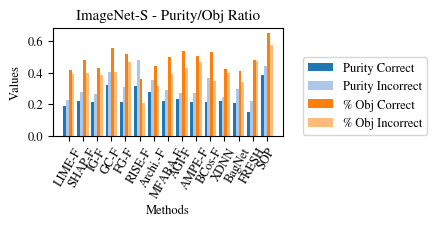

In [9]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.size': 9,
    'font.family': 'STIXGeneral' #'Times New Roman'
})  # Set a default font size


name_mapping = {
    'lime_20': 'LIME-F',
    'shap_20': 'SHAP-F',
    'intgrad': 'IG-F',
    'gradcam': 'GC-F',
    'fullgrad': 'FG-F',
    'rise_20': 'RISE-F',
    'archipelago': 'Archi.-F',
    'mfaba': 'MFABA-F',
    'agi': 'AGI-F',
    'ampe': 'AMPE-F',
    'bcos': 'BCos-F',
    'xdnn': 'XDNN',
    'bagnet': 'BagNet',
    'attn': 'FRESH',
    'sop_max': 'SOP',
}

# Define methods from purities_split keys
methods = list(name_mapping.keys())

# Extract values from purities_split
purity_correct = [purities_split[method]['purity_correct'] for method in methods]
purity_incorrect = [purities_split[method]['purity_incorrect'] for method in methods]
ratio_obj_correct = [purities_split[method]['ratio_obj_correct'] for method in methods]
ratio_obj_incorrect = [purities_split[method]['ratio_obj_incorrect'] for method in methods]

# Set width of bar
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(purity_correct))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
colors_all = cm.get_cmap('tab20')

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(5, 1.5))  # Adjust figure size as needed
# fig, ax = plt.subplots(figsize=(3, 2))  # Adjust figure size as needed

ax.bar(r1, purity_correct, color=colors_all(0), width=barWidth, label='Purity Correct')
ax.bar(r2, purity_incorrect, color=colors_all(1), width=barWidth, label='Purity Incorrect')
ax.bar(r3, ratio_obj_correct, color=colors_all(2), width=barWidth, label='% Obj Correct')
ax.bar(r4, ratio_obj_incorrect, color=colors_all(3), width=barWidth, label='% Obj Incorrect')

# Add xticks on the middle of the group bars
ax.set_xlabel('Methods')
ax.set_xticks([r + 1.5*barWidth for r in range(len(purity_correct))])
ax.set_xticklabels([name_mapping[method] for method in methods], rotation=60)

# Add labels
ax.set_ylabel('Values')
ax.set_title('ImageNet-S - Purity/Obj Ratio')

# Adjust layout
plt.tight_layout()

# Create legend
legend = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Adjust the bottom margin to make room for the legend
fig.subplots_adjust(bottom=0.3)

# Save and show the plot
file_name = 'imagenet_figs/purity_ratio_correct_incorrect_imagenet.pdf'
# file_name = 'imagenet_figs/purity_ratio_correct_incorrect_imagenet_small.pdf'
print(file_name)
plt.savefig(file_name, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Final

In [28]:
import json

with open('../neurips2024_figs/acc_purity_baselines_imagenet.json', 'rt') as input_file:
    other_results = json.load(input_file)
# for k, v in other_results.items():
#     if k not in results:
#         results[k] = v

In [29]:
other_results.keys()

dict_keys(['attn', 'fullgrad', 'gradcam', 'intgrad', 'lime_20', 'rise_20', 'shap_20', 'archipelago', 'backbone', 'mfaba', 'agi', 'ampe', 'xdnn'])

In [30]:
import json

with open('../neurips2024_figs/acc_purity_rebuttal_faithful_imagenet.json', 'rt') as input_file:
    other_results2 = json.load(input_file)
# for k, v in other_results.items():
#     if k not in results:
#         results[k] = v
other_results2.keys()

dict_keys(['bcos', 'xdnn', 'bcos-s', 'xdnn-s', 'bagnet'])

In [31]:
results = other_results2
for k, v in other_results.items():
    if k not in results:
        results[k] = v
        
with open('../neurips2024_figs/acc_purity_sop_max_imagenet.json', 'rt') as input_file:
    sop_results = json.load(input_file)
results['sop_max'] = sop_results['sop_max']

In [32]:
for method in results:
    print(method, len(results[method]['accs']))

bcos 919
xdnn 919
bcos-s 919
xdnn-s 919
bagnet 919
attn 919
fullgrad 918
gradcam 918
intgrad 919
lime_20 919
rise_20 919
shap_20 919
archipelago 919
backbone 919
mfaba 919
agi 919
ampe 919
sop_max 919


In [33]:
import torch

results_all_bagnet = torch.load('bagnet_purity.pt')
for k in results_all_bagnet['bagnet']:
    results['bagnet'][k] = results_all_bagnet['bagnet'][k]

In [34]:
import numpy as np
purities_split = {}
for method in results:
    if method == 'backbone':
        continue
    correct_entropy = np.mean([
        results[method]['entropies'][i] 
        for i in range(len(results[method]['entropies'])) if results[method]['accs'][i]
    ])
    incorrect_entropy = np.mean([
        results[method]['entropies'][i] 
        for i in range(len(results[method]['entropies'])) if not results[method]['accs'][i]
    ])
    correct_ratio_obj = np.mean([
        results[method]['ratios_obj'][i] 
        for i in range(len(results[method]['ratios_obj'])) if results[method]['accs'][i]
    ])
    incorrect_ratio_obj = np.mean([
        results[method]['ratios_obj'][i] 
        for i in range(len(results[method]['ratios_obj'])) if not results[method]['accs'][i]
    ])
    correct_ratio_obj_cover = np.mean([
        results[method]['ratios_obj_coverage'][i] 
        for i in range(len(results[method]['ratios_obj_coverage'])) if results[method]['accs'][i]
    ])
    incorrect_ratio_obj_cover = np.mean([
        results[method]['ratios_obj_coverage'][i] 
        for i in range(len(results[method]['ratios_obj_coverage'])) if not results[method]['accs'][i]
    ])
    correct_obj_size = np.mean([
        0.2 * results[method]['ratios_obj'][i] / results[method]['ratios_obj_coverage'][i] 
        for i in range(len(results[method]['ratios_obj_coverage'])) if results[method]['accs'][i]
    ])
    incorrect_obj_size = np.mean([
        0.2 * results[method]['ratios_obj'][i] / results[method]['ratios_obj_coverage'][i]
        for i in range(len(results[method]['ratios_obj_coverage'])) if not results[method]['accs'][i]
    ])
    
    purities_split[method] = {
        'purity_correct': 1 - correct_entropy,
        'purity_incorrect': 1 - incorrect_entropy,
        'ratio_obj_correct': correct_ratio_obj,
        'ratio_obj_incorrect': incorrect_ratio_obj,
        'ratio_obj_cover_correct': correct_ratio_obj_cover,
        'ratio_obj_cover_incorrect': incorrect_ratio_obj_cover,
        'correct_obj_size': correct_obj_size,
        'incorrect_obj_size': incorrect_obj_size,
    }
purities_split

{'bcos': {'purity_correct': 0.28364423583661846,
  'purity_incorrect': 0.3953185178140013,
  'ratio_obj_correct': 0.4472124159992745,
  'ratio_obj_incorrect': 0.31020114808057797,
  'ratio_obj_cover_correct': 0.2958515188583988,
  'ratio_obj_cover_incorrect': 0.19765071673698015,
  'correct_obj_size': 0.33007961246324796,
  'incorrect_obj_size': 0.3078126811556214},
 'xdnn': {'purity_correct': 0.21080890081445625,
  'purity_incorrect': 0.27855059477138044,
  'ratio_obj_correct': 0.4230485219478937,
  'ratio_obj_incorrect': 0.3839297455442578,
  'ratio_obj_cover_correct': 0.3302119018250628,
  'ratio_obj_cover_incorrect': 0.2783421877814272,
  'correct_obj_size': 0.3041061136107224,
  'incorrect_obj_size': 0.3214852551818487},
 'bcos-s': {'purity_correct': 0.2122523814439774,
  'purity_incorrect': 0.3667315442070769,
  'ratio_obj_correct': 0.5337406565745672,
  'ratio_obj_incorrect': 0.34529162591218915,
  'ratio_obj_cover_correct': 0.3921241372823715,
  'ratio_obj_cover_incorrect': 0.2

/tmp/ipykernel_742/1714577194.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_all = cm.get_cmap('tab20')


imagenet_figs/purity_ratio_correct_incorrect_imagenet.pdf


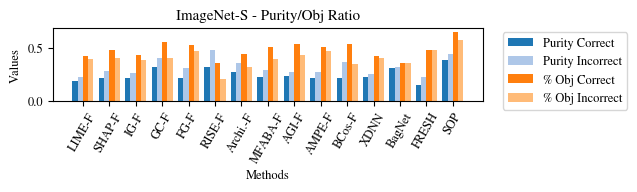

In [35]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.size': 9,
    'font.family': 'STIXGeneral' #'Times New Roman'
})  # Set a default font size


name_mapping = {
    'lime_20': 'LIME-F',
    'shap_20': 'SHAP-F',
    'intgrad': 'IG-F',
    'gradcam': 'GC-F',
    'fullgrad': 'FG-F',
    'rise_20': 'RISE-F',
    'archipelago': 'Archi.-F',
    'mfaba': 'MFABA-F',
    'agi': 'AGI-F',
    'ampe': 'AMPE-F',
    'bcos-s': 'BCos-F',
    'xdnn-s': 'XDNN',
    'bagnet': 'BagNet',
    'attn': 'FRESH',
    'sop_max': 'SOP',
}

# Define methods from purities_split keys
methods = list(name_mapping.keys())

# Extract values from purities_split
purity_correct = [purities_split[method]['purity_correct'] for method in methods]
purity_incorrect = [purities_split[method]['purity_incorrect'] for method in methods]
ratio_obj_correct = [purities_split[method]['ratio_obj_correct'] for method in methods]
ratio_obj_incorrect = [purities_split[method]['ratio_obj_incorrect'] for method in methods]

# Set width of bar
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(purity_correct))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
colors_all = cm.get_cmap('tab20')

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(5, 1.5))  # Adjust figure size as needed
# fig, ax = plt.subplots(figsize=(3, 2))  # Adjust figure size as needed

ax.bar(r1, purity_correct, color=colors_all(0), width=barWidth, label='Purity Correct')
ax.bar(r2, purity_incorrect, color=colors_all(1), width=barWidth, label='Purity Incorrect')
ax.bar(r3, ratio_obj_correct, color=colors_all(2), width=barWidth, label='% Obj Correct')
ax.bar(r4, ratio_obj_incorrect, color=colors_all(3), width=barWidth, label='% Obj Incorrect')

# Add xticks on the middle of the group bars
ax.set_xlabel('Methods')
ax.set_xticks([r + 1.5*barWidth for r in range(len(purity_correct))])
ax.set_xticklabels([name_mapping[method] for method in methods], rotation=60)

# Add labels
ax.set_ylabel('Values')
ax.set_title('ImageNet-S - Purity/Obj Ratio')

# Adjust layout
plt.tight_layout()

# Create legend
legend = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Adjust the bottom margin to make room for the legend
fig.subplots_adjust(bottom=0.3)

# Save and show the plot
file_name = 'imagenet_figs/purity_ratio_correct_incorrect_imagenet.pdf'
# file_name = 'imagenet_figs/purity_ratio_correct_incorrect_imagenet_small.pdf'
print(file_name)
plt.savefig(file_name, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [36]:
table_data = {
    "LIME-F": {"ImageNet-S Pur": "0.201 $\\pm$ 0.008", "CosmoGrid MSE": "0.049 $\\pm$ 0.003", "CosmoGrid Pur": "0.375 $\\pm$ 0.018", "Model-Agnostic": "Yes"},
    "SHAP-F": {"ImageNet-S Pur": "0.238 $\\pm$ 0.009", "CosmoGrid MSE": "0.028 $\\pm$ 0.002", "CosmoGrid Pur": "0.397 $\\pm$ 0.016", "Model-Agnostic": "Yes"},
    "IG-F": {"ImageNet-S Pur": "0.242 $\\pm$ 0.009", "CosmoGrid MSE": "0.042 $\\pm$ 0.003", "CosmoGrid Pur": "0.391 $\\pm$ 0.011", "Model-Agnostic": "Yes"},
    "GC-F": {"ImageNet-S Pur": "0.361 $\\pm$ 0.011", "CosmoGrid MSE": "0.036 $\\pm$ 0.002", "CosmoGrid Pur": "0.438 $\\pm$ 0.019", "Model-Agnostic": "Yes"},
    "FG-F": {"ImageNet-S Pur": "0.260 $\\pm$ 0.009", "CosmoGrid MSE": "0.036 $\\pm$ 0.002", "CosmoGrid Pur": "0.529 $\\pm$ 0.016", "Model-Agnostic": "Yes"},
    "RISE-F": {"ImageNet-S Pur": "0.436 $\\pm$ 0.011", "CosmoGrid MSE": "0.036 $\\pm$ 0.003", "CosmoGrid Pur": "0.342 $\\pm$ 0.006", "Model-Agnostic": "Yes"},
    "Archi-F": {"ImageNet-S Pur": "0.316 $\\pm$ 0.010", "CosmoGrid MSE": "0.069 $\\pm$ 0.002", "CosmoGrid Pur": "0.487 $\\pm$ 0.004", "Model-Agnostic": "Yes"},
    "MFABA-F": {"ImageNet-S Pur": "0.258 $\\pm$ 0.009", "CosmoGrid MSE": "0.035 $\\pm$ 0.003", "CosmoGrid Pur": "0.498 $\\pm$ 0.014", "Model-Agnostic": "Yes"},
    "AGI-F": {"ImageNet-S Pur": "0.250 $\\pm$ 0.009", "CosmoGrid MSE": "0.040 $\\pm$ 0.002", "CosmoGrid Pur": "0.522 $\\pm$ 0.010", "Model-Agnostic": "Yes"},
    "AMPE-F": {"ImageNet-S Pur": "0.241 $\\pm$ 0.008", "CosmoGrid MSE": "0.037 $\\pm$ 0.002", "CosmoGrid Pur": "0.366 $\\pm$ 0.037", "Model-Agnostic": "Yes"},
    "BCos-F": {"ImageNet-S Pur": "0.364 $\\pm$ 0.011", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "XDNN": {"ImageNet-S Pur": "0.249 $\\pm$ 0.009", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "BagNet": {"ImageNet-S Pur": "0.261 $\\pm$ 0.009", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "FRESH": {"ImageNet-S Pur": "0.191 $\\pm$ 0.008", "CosmoGrid MSE": "-", "CosmoGrid Pur": "-", "Model-Agnostic": "No"},
    "SOP": {"ImageNet-S Pur": "0.401 $\\pm$ 0.011", "CosmoGrid MSE": "0.025 $\\pm$ 0.002", "CosmoGrid Pur": "0.647 $\\pm$ 0.011", "Model-Agnostic": "Yes"}
}

In [37]:
import numpy as np
import random

SEED = 42
def bootstrap_mean_std(corrects, n_samples=4):
    means = []
    random.seed(SEED)
    for _ in range(n_samples):
        sample = random.choices(corrects, k=len(corrects))  # sampling with replacement
        means.append(np.mean(sample))
    return np.mean(means), np.std(means)


# Calculate mean and std for each explainer
final_results_purity = {}
for key, metrics in results.items():
    try:
        explainer_name = name_mapping[key]  # map key to row name
        mean, std = bootstrap_mean_std([1 - x for x in metrics['entropies']])
        final_results_purity[explainer_name] = f'{mean:.3f} $\\pm$ {std:.3f}'
    except:
        continue

# Print the results
for method, result in final_results_purity.items():
    print(f"{method}: {result}")
    
for key in table_data:
    if key in final_results_purity:
        table_data[key]['ImageNet-S Pur'] = final_results_purity[key]

BCos-F: 0.361 $\pm$ 0.011
XDNN: 0.246 $\pm$ 0.006
BagNet: 0.306 $\pm$ 0.008
FRESH: 0.186 $\pm$ 0.007
FG-F: 0.265 $\pm$ 0.008
GC-F: 0.363 $\pm$ 0.003
IG-F: 0.240 $\pm$ 0.008
LIME-F: 0.195 $\pm$ 0.006
RISE-F: 0.441 $\pm$ 0.008
SHAP-F: 0.232 $\pm$ 0.009
Archi.-F: 0.316 $\pm$ 0.007
MFABA-F: 0.251 $\pm$ 0.002
AGI-F: 0.244 $\pm$ 0.003
AMPE-F: 0.235 $\pm$ 0.004
SOP: 0.394 $\pm$ 0.007


In [38]:
name_mapping = {
    'lime_20': 'LIME-F',
    'shap_20': 'SHAP-F',
    'gradcam': 'GC-F',
    'intgrad': 'IG-F',
    'fullgrad': 'FG-F',
    'rise_20': 'RISE-F',
    'archipelago': 'Archi-F',
    'mfaba': 'MFABA-F',
    'agi': 'AGI-F',
    'ampe': 'AMPE-F',
    'bcos': 'BCos-F',
    'xdnn': 'XDNN',
    'bagnet': 'BagNet',
    'attn': 'FRESH',
    'sop': 'SOP',
}

import torch
imagenet_s_acc_dict = torch.load('imagenet_acc_all2.pt')

In [39]:
import numpy as np
import random

SEED = 42
def bootstrap_mean_std(corrects, n_samples=4):
    means = []
    random.seed(SEED)
    for _ in range(n_samples):
        sample = random.choices(corrects, k=len(corrects))  # sampling with replacement
        means.append(np.mean(sample))
    return np.mean(means), np.std(means)


# Calculate mean and std for each explainer
final_results = {}
for key, metrics in imagenet_s_acc_dict.items():
    try:
        explainer_name = name_mapping[key]  # map key to row name
        mean, std = bootstrap_mean_std([1 - x for x in metrics['corrects']])
        final_results[explainer_name] = f'{mean:.3f} $\\pm$ {std:.3f}'
    except:
        continue

# Print the results
for method, result in final_results.items():
    print(f"{method}: {result}")
    
for key in table_data:
    table_data[key]['ImageNet-S Err'] = final_results[key]

BCos-F: 0.954 $\pm$ 0.006
XDNN: 0.871 $\pm$ 0.007
BagNet: 0.501 $\pm$ 0.011
SOP: 0.267 $\pm$ 0.017
SHAP-F: 0.306 $\pm$ 0.027
RISE-F: 0.732 $\pm$ 0.009
LIME-F: 0.327 $\pm$ 0.014
FG-F: 0.448 $\pm$ 0.024
GC-F: 0.455 $\pm$ 0.016
IG-F: 0.581 $\pm$ 0.013
FRESH: 0.537 $\pm$ 0.020
Archi-F: 0.526 $\pm$ 0.016
MFABA-F: 0.493 $\pm$ 0.016
AGI-F: 0.407 $\pm$ 0.011
AMPE-F: 0.484 $\pm$ 0.016


In [40]:
def generate_latex_table(table_data):
    latex_table = r"""\begin{tabularx}{\textwidth}{c|c|*{1}>{\centering\arraybackslash}X|*{2}{>{\centering\arraybackslash}X}|*{2}{>{\centering\arraybackslash}X}}
    \toprule
    \multirow{2}{*}{Category} & \multirow{2}{*}{Method} & \multirow{2}{*}{Model-Agnostic} & \multicolumn{2}{c|}{\textbf{ImageNet-S}} & \multicolumn{2}{c}{\textbf{CosmoGrid}} \\
    & & & Err.$\downarrow$ & Pur.$\uparrow$ & MSE.$\downarrow$ & Pur.$\uparrow$ \\
    \midrule
    """

    post_hoc_methods = ["LIME-F", "SHAP-F", "IG-F", "GC-F", "FG-F", "RISE-F", "Archi-F", "MFABA-F", "AGI-F", "AMPE-F", "BCos-F", "XDNN"]
    self_explaining_methods = ["BagNet", "FRESH", "SOP"]
    all_methods = post_hoc_methods + self_explaining_methods

    def get_value(s):
        return float(s.split()[0]) if s != '-' else float('-inf')

    metrics = ["ImageNet-S Err", "ImageNet-S Pur", "CosmoGrid MSE", "CosmoGrid Pur"]
    best = {
        "ImageNet-S Err": min((get_value(table_data[method]["ImageNet-S Err"]), method) for method in all_methods),
        "ImageNet-S Pur": max((get_value(table_data[method]["ImageNet-S Pur"]), method) for method in all_methods),
        "CosmoGrid MSE": min((get_value(table_data[method]["CosmoGrid MSE"]), method) for method in all_methods if table_data[method]["CosmoGrid MSE"] != '-'),
        "CosmoGrid Pur": max((get_value(table_data[method]["CosmoGrid Pur"]), method) for method in all_methods if table_data[method]["CosmoGrid Pur"] != '-')
    }
    second_best = {
        "ImageNet-S Err": sorted([(get_value(table_data[method]["ImageNet-S Err"]), method) for method in all_methods])[1],
        "ImageNet-S Pur": sorted([(get_value(table_data[method]["ImageNet-S Pur"]), method) for method in all_methods], reverse=True)[1],
        "CosmoGrid MSE": sorted([(get_value(table_data[method]["CosmoGrid MSE"]), method) for method in all_methods if table_data[method]["CosmoGrid MSE"] != '-'])[1],
        "CosmoGrid Pur": sorted([(get_value(table_data[method]["CosmoGrid Pur"]), method) for method in all_methods if table_data[method]["CosmoGrid Pur"] != '-'], reverse=True)[1]
    }

    def format_value(method, metric):
        value = table_data[method][metric]
        if value == '-':
            return value
        mean, std = value.split(' $\\pm$ ')
        if method == best[metric][1]:
            return r"\textbf{" + mean + "} $\\pm$ " + std
        elif method == second_best[metric][1]:
            return r"\textit{" + mean + "} $\\pm$ " + std
        return value

    latex_table += " & ".join(["Post-hoc-", "LIME-F", table_data["LIME-F"]["Model-Agnostic"]] + 
                              [format_value("LIME-F", m) for m in metrics]) + r" \\"
    latex_table += "\n"

    for method in post_hoc_methods[1:]:
        latex_table += " & ".join(["Converted" if method == "SHAP-F" else "", method, table_data[method]["Model-Agnostic"]] + 
                                  [format_value(method, m) for m in metrics]) + r" \\"
        latex_table += "\n"

    latex_table += r"\midrule" + "\n"
    latex_table += r"\multirow{3}{*}{Self-Explaining}"

    for method in self_explaining_methods:
        latex_table += " & ".join(["", method, table_data[method]["Model-Agnostic"]] + 
                                  [format_value(method, m) for m in metrics]) + r" \\"
        latex_table += "\n"

    latex_table += r"\bottomrule" + "\n"
    latex_table += r"\end{tabularx}"

    return latex_table

# Use the function with the provided table_data
print(generate_latex_table(table_data))

\begin{tabularx}{\textwidth}{c|c|*{1}>{\centering\arraybackslash}X|*{2}{>{\centering\arraybackslash}X}|*{2}{>{\centering\arraybackslash}X}}
    \toprule
    \multirow{2}{*}{Category} & \multirow{2}{*}{Method} & \multirow{2}{*}{Model-Agnostic} & \multicolumn{2}{c|}{\textbf{ImageNet-S}} & \multicolumn{2}{c}{\textbf{CosmoGrid}} \\
    & & & Err.$\downarrow$ & Pur.$\uparrow$ & MSE.$\downarrow$ & Pur.$\uparrow$ \\
    \midrule
    Post-hoc- & LIME-F & Yes & 0.327 $\pm$ 0.014 & 0.195 $\pm$ 0.006 & 0.049 $\pm$ 0.003 & 0.375 $\pm$ 0.018 \\
Converted & SHAP-F & Yes & \textit{0.306} $\pm$ 0.027 & 0.232 $\pm$ 0.009 & \textit{0.028} $\pm$ 0.002 & 0.397 $\pm$ 0.016 \\
 & IG-F & Yes & 0.581 $\pm$ 0.013 & 0.240 $\pm$ 0.008 & 0.042 $\pm$ 0.003 & 0.391 $\pm$ 0.011 \\
 & GC-F & Yes & 0.455 $\pm$ 0.016 & 0.363 $\pm$ 0.003 & 0.036 $\pm$ 0.002 & 0.438 $\pm$ 0.019 \\
 & FG-F & Yes & 0.448 $\pm$ 0.024 & 0.265 $\pm$ 0.008 & 0.036 $\pm$ 0.002 & \textit{0.529} $\pm$ 0.016 \\
 & RISE-F & Yes & 0.732 $\pm$ 0.009 

In [41]:
backbone_acc = imagenet_s_acc_dict['backbone']['acc']
backbone_acc

0.9031556039173014

/tmp/ipykernel_742/834207708.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(Xs[-1:], Ys[-1:], xerr=Xerr[-1:], yerr=Yerr[-1:], fmt='o', color='red', marker='*', markersize=5, elinewidth=1, ecolor='k')


imagenet_figs/error_rate_vs_purity_imagenet.pdf


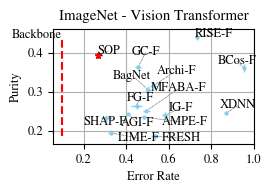

In [42]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import ConnectionPatch
import numpy as np

plt.rcParams.update({
    'font.size': 9,
    'font.family': 'STIXGeneral'
})

# Function to determine Pareto frontier
def pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]
    for pair in myList[1:]:
        if maxY:
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

labels = list(table_data.keys())

title_X = r'Error Rate'
title_Y = r'Purity'
title = f'{title_X} vs {title_Y}'

fig, ax = plt.subplots(figsize=(2.6, 1.5))
Xs = [float(table_data[key]["ImageNet-S Err"].split()[0]) for key in table_data]
Ys = [float(table_data[key]["ImageNet-S Pur"].split()[0]) for key in table_data]
Xerr = [float(table_data[key]["ImageNet-S Err"].split()[-1]) for key in table_data]
Yerr = [float(table_data[key]["ImageNet-S Pur"].split()[-1]) for key in table_data]
# Xerr = [data[key]['err_std'] for key in name_mapping]  # Standard deviations for X
# Yerr = [data[key]['purity_std'] for key in name_mapping]  # Standard deviations for Y
# labels = list(name_mapping.keys())
pf_X, pf_Y = pareto_frontier(Xs, Ys, maxX=False, maxY=True)

# Using errorbar to add both scatter points and error bars
ax.errorbar(Xs[:-1], Ys[:-1], xerr=Xerr[:-1], yerr=Yerr[:-1], fmt='o', color='skyblue', markersize=2, elinewidth=1) #, ecolor='k')
ax.errorbar(Xs[-1:], Ys[-1:], xerr=Xerr[-1:], yerr=Yerr[-1:], fmt='o', color='red', marker='*', markersize=5, elinewidth=1, ecolor='k')

texts = []
for i, txt in enumerate(labels):
    texts.append(ax.annotate(txt, (Xs[i], Ys[i])))
adjust_text(texts)

# Adding lines from text to marker
for i, txt in enumerate(labels):
    text = texts[i]
    ax.add_patch(ConnectionPatch(
        xyA=(Xs[i], Ys[i]), xyB=(text.get_position()),
        coordsA="data", coordsB="data",
        axesA=ax, axesB=ax,
        color="grey", linewidth=0.5, linestyle="--"
    ))
    
ax.set_xlabel(title.split('vs')[0].strip()) # + r' $\downarrow$')
ax.set_ylabel(title.split('vs')[1].strip()) # + r' $\uparrow$')
ax.set_title('ImageNet - Vision Transformer')
ax.grid(True)
backbone_Xs = [1 - backbone_acc, 1 - backbone_acc]
backbone_Ys = [min(Ys), max(Ys)]
ax.plot(backbone_Xs, backbone_Ys, color='red', linestyle='--')
ax.text(backbone_Xs[1], backbone_Ys[1] + 0.02, 'Backbone', color='k', ha='right', va='top')

file_name = f'imagenet_figs/{title.replace(" ", "_").lower()}_imagenet.pdf'
print(file_name)
plt.savefig(file_name, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()